In [106]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

import seaborn as sns
from seaborn import load_dataset

from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score

In [107]:
# Load Titanic dataset
df = load_dataset("titanic")

In [108]:
df.head()

,survived,pclass,sex,age,sibsp,parch,fare,embarked,class,who,adult_male,deck,embark_town,alive,alone
0,0,3,male,22.0,1,0,7.2500,S,Third,man,True,NaN,Southampton,no,False
1,1,1,female,38.0,1,0,71.2833,C,First,woman,False,C,Cherbourg,yes,False
2,1,3,female,26.0,0,0,7.9250,S,Third,woman,False,NaN,Southampton,yes,True
3,1,1,female,35.0,1,0,53.1000,S,First,woman,False,C,Southampton,yes,False
4,0,3,male,35.0,0,0,8.0500,S,Third,man,True,NaN,Southampton,no,True


In [109]:
df.shape

(891, 15)

In [110]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 15 columns):
 #   Column       Non-Null Count  Dtype   
---  ------       --------------  -----   
 0   survived     891 non-null    int64   
 1   pclass       891 non-null    int64   
 2   sex          891 non-null    object  
 3   age          714 non-null    float64 
 4   sibsp        891 non-null    int64   
 5   parch        891 non-null    int64   
 6   fare         891 non-null    float64 
 7   embarked     889 non-null    object  
 8   class        891 non-null    category
 9   who          891 non-null    object  
 10  adult_male   891 non-null    bool    
 11  deck         203 non-null    category
 12  embark_town  889 non-null    object  
 13  alive        891 non-null    object  
 14  alone        891 non-null    bool    
dtypes: bool(2), category(2), float64(2), int64(4), object(5)
memory usage: 80.7+ KB


In [111]:
df = df[['age', 'fare', 'sex', 'class', 'who','survived']]

In [112]:
df.shape

(891, 6)

In [113]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 6 columns):
 #   Column    Non-Null Count  Dtype   
---  ------    --------------  -----   
 0   age       714 non-null    float64 
 1   fare      891 non-null    float64 
 2   sex       891 non-null    object  
 3   class     891 non-null    category
 4   who       891 non-null    object  
 5   survived  891 non-null    int64   
dtypes: category(1), float64(2), int64(1), object(2)
memory usage: 35.9+ KB


In [114]:
df.dropna(inplace = True)

In [115]:
df.head()

,age,fare,sex,class,who,survived
0,22.0,7.2500,male,Third,man,0
1,38.0,71.2833,female,First,woman,1
2,26.0,7.9250,female,Third,woman,1
3,35.0,53.1000,female,First,woman,1
4,35.0,8.0500,male,Third,man,0


In [116]:
df.value_counts('sex')

sex
male      453
female    261
Name: count, dtype: int64

In [117]:
df.value_counts('class')

class
Third     355
First     186
Second    173
Name: count, dtype: int64

In [118]:
X = df[['age', 'fare', 'sex', 'class', 'who']]
y = df['survived'] 

In [119]:
# One-hot encoding for 'sex', 'class', 'who'
# get_dummies is a pandas function used to convert text categories → numbers
X = pd.get_dummies(X, drop_first=True, dtype = 'int')
X = X.astype(int)
X.head()

,age,fare,sex_male,class_Second,class_Third,who_man,who_woman
0,22,7,1,0,1,1,0
1,38,71,0,0,0,0,1
2,26,7,0,0,1,0,1
3,35,53,0,0,0,0,1
4,35,8,1,0,1,1,0


<Axes: >

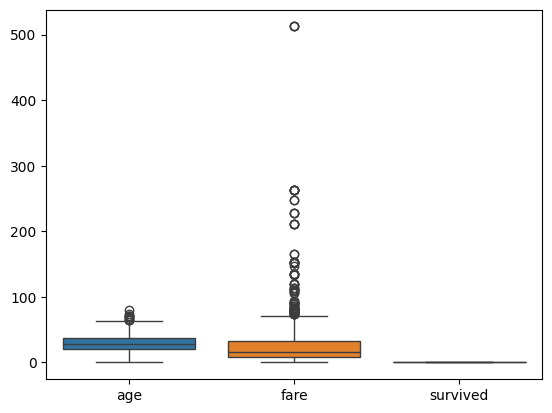

In [120]:
sns.boxplot(df)

In [121]:
#feature Scaling 
from sklearn.preprocessing import RobustScaler
scaler = RobustScaler()
X_scaled = scaler.fit_transform(X)
X_scaled[0]

array([-0.33333333, -0.32      ,  0.        ,  0.        ,  1.        ,
        0.        ,  0.        ])

In [122]:
# Train Test Split
X_train, X_test, y_train, y_test = train_test_split(X_scaled,y,test_size = 0.2, random_state = 21)

In [123]:
# Train model
model = LogisticRegression(max_iter=500)
model.fit(X_train, y_train)

# Evaluate
y_pred = model.predict(X_test)
print("Accuracy with data leakage:", accuracy_score(y_test, y_pred))

Accuracy with data leakage: 0.8041958041958042


# Assumption
Accuracy with data leakage: 0.80 ✅ (Suspiciously high!)
so there is chance to data leakage

In [128]:
# Remove leaky feature ("fare")
print(X_scaled.shape)
X_scaled = np.delete(X_scaled, 1, axis=1)  # No "fare"
print(X_scaled.shape)

(714, 7)
(714, 6)


In [137]:
X_train, X_test, y_train, y_test = train_test_split(X_scaled,y,test_size = 0.2, random_state = 41)

In [138]:
model = LogisticRegression(max_iter=500)
model.fit(X_train, y_train)

LogisticRegression(max_iter=500)

In [155]:
# Evaluate
y_pred = model.predict(X_test)
print("Accuracy without data leakage:", accuracy_score(y_test, y_pred))

Accuracy without data leakage: 0.7027027027027027


# Observations
Model Type	 		
1. With Data Leakage (Fare)
2. Without Data Leakage

Accuracy
1. 0.80
2. 0.70

Realistic?
1. No
2. Yes

Why?
1. "Fare" indirectly hints at survival
2. Uses only genuine predictive features